In [1]:
# %% First run this command, and then select the dlt enviroment

from ipynb_header import *
# set cuda
cwd = os.getcwd()
print(cwd)
torch.cuda.set_device(0)

/home/phphuc/Desktop/GarmentRecon/GarmentCode/omages


/home/phphuc/miniconda3/envs/dlt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/phphuc/Desktop/GarmentRecon/GarmentCode/omages


In [2]:
import numpy as np
file_path = '/home/phphuc/Desktop/GarmentRecon/GarmentCode/omages/datasets/ABO/omages/df_p64_m02_res64.h5'
with h5py.File(file_path, 'r') as h5_file:
    # List all groups
    print("Keys: %s" % h5_file.keys())
    # Get the data
    data = h5_file['omage'][:]

np.save('test.npy', data[421])

Keys: <KeysViewHDF5 ['omage']>


In [3]:
!pip install bmesh

ERROR: Could not find a version that satisfies the requirement bmesh (from versions: none)
ERROR: No matching distribution found for bmesh


Read blend: "/home/phphuc/Desktop/GarmentRecon/GarmentCode/omages/xgutils/assets/preset_glb.blend"
Recursive unused data blocks cleanup complete.
Time stamp: #1 loading preset blend
0.0058155059814453125 0.0058155059814453125
position (1048576, 3)
occupancy (1048576, 1)
objnormal (1048576, 3)
color (1048576, 3)
metal (1048576, 1)
rough (1048576, 1)
segmentation (1048576, 1)
segcolor (1048576, 3)
Time stamp: #2 meshing omage
0.23872828483581543 0.24454379081726074
Time stamp: #3 create mesh in blender
0.8963391780853271 1.140882968902588
Time stamp: #4 create material
0.18488764762878418 1.325770616531372
Time stamp: #5 save blend and glbs
4.38690185546875e-05 1.3258144855499268
[5.81550598e-03 2.38728285e-01 8.96339178e-01 1.84887648e-01
 4.38690186e-05]
3 8.9634e-01 create mesh in blender
2 2.3873e-01 meshing omage
4 1.8489e-01 create material
1 5.8155e-03 loading preset blend
5 4.3869e-05 save blend and glbs
output_path /home/phphuc/.temp/xgutils/SL6KZ89VFP.png
default samples 4096
F

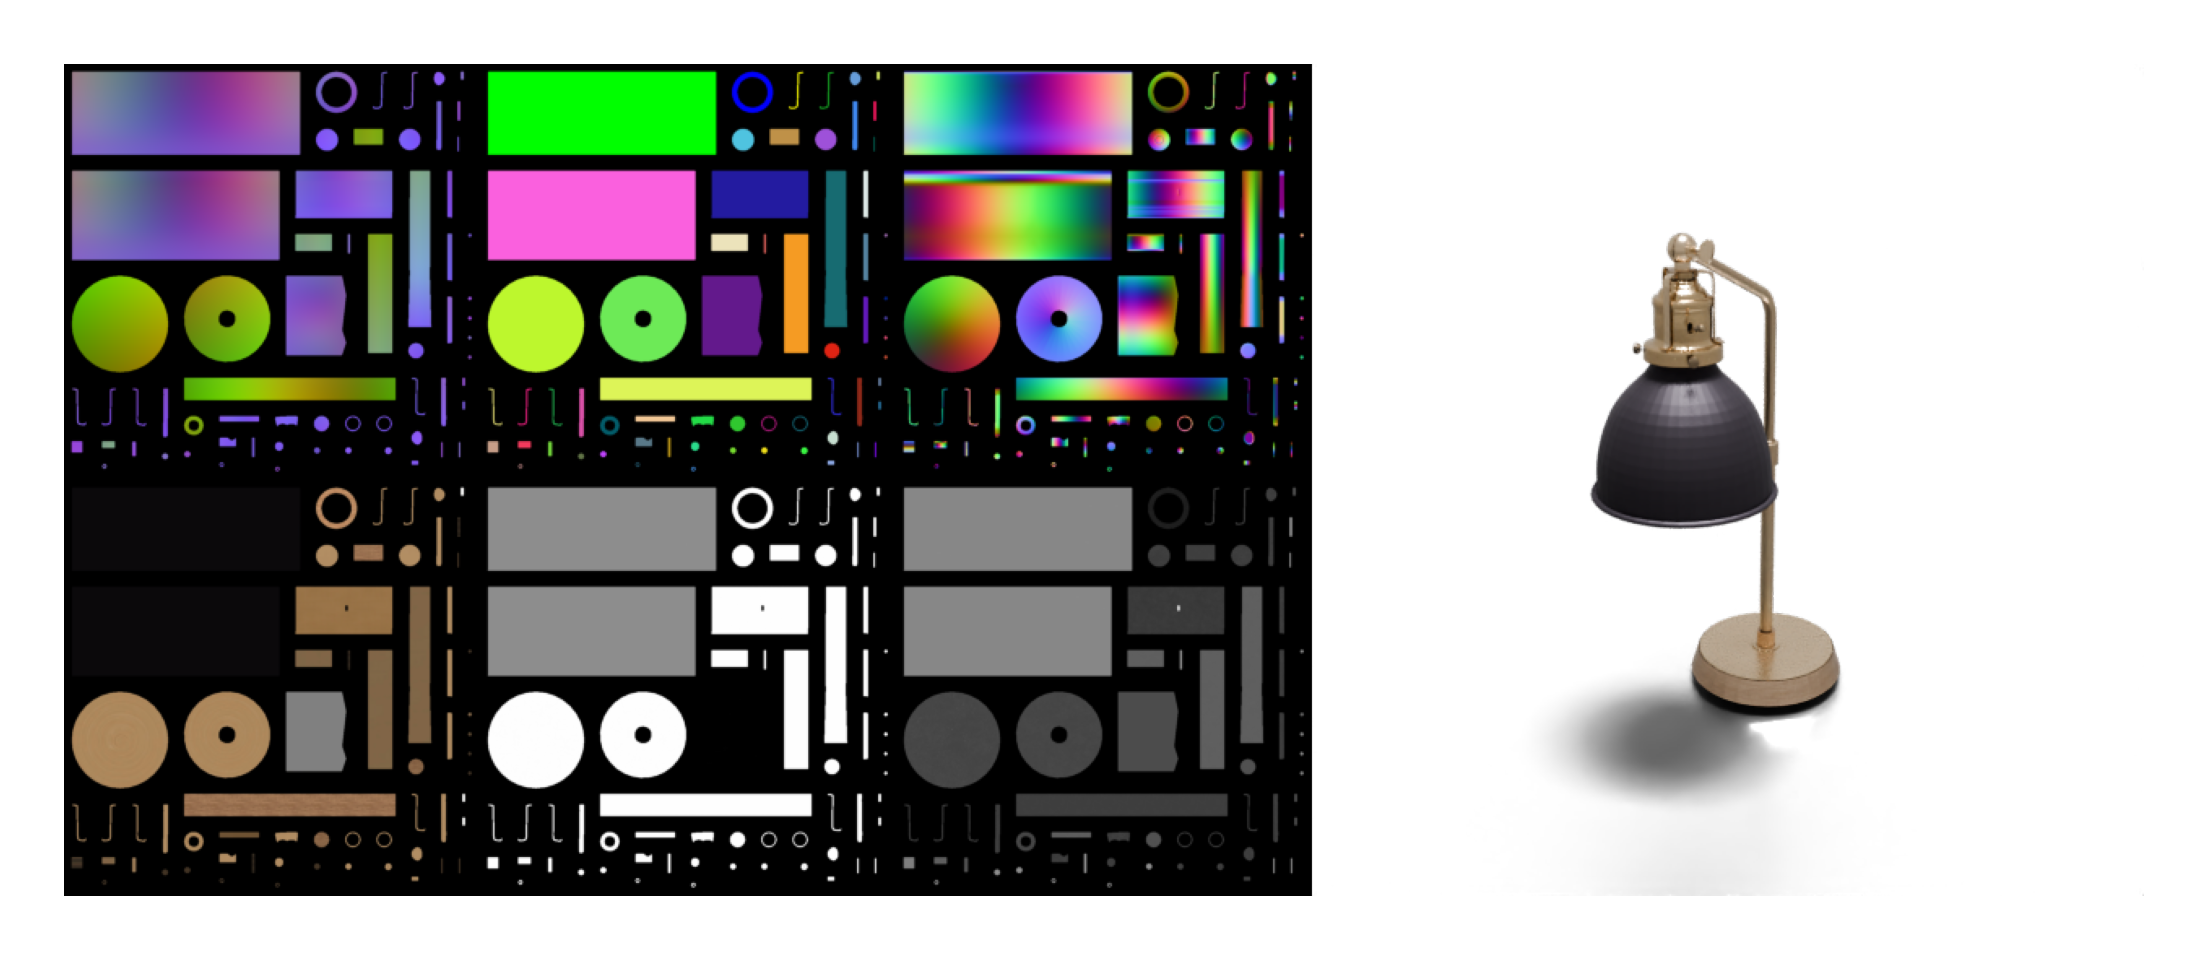

(<Figure size 1280x512 with 1 Axes>, <Axes: >)

In [ ]:
# %%
import bpy  # import before bmesh
from xgutils import omgutil
example_omage_1024 = 'assets/B0742FHDJF_objamage_tensor_1024.npz'
# example_omage_1024 = 'test.npy'
omage = omgutil.load_omg(example_omage_1024)
vomg, rdimg, _ = omgutil.preview_omg(omage)
visutil.showImg(vomg)

In [ ]:
# %% #################### You can also save the decoded omage to .blend and .glb files

os.makedirs(f'./temp', exist_ok=True)
vomg, rdimg, _ = omgutil.preview_omg(omage, decoder_kwargs=dict(
    render_mode='segcolor', save_path=f'{cwd}/temp/omage_preview_B0742FHDJF.blend'))
# a .glb file with the same name will be saved in the same directory
# You can use the 'glTF Model Viewer' plugin in vscode to directly see it!

In [ ]:
# %% #################### See the patch segmentation of the omage

vomg, rdimg, _ = omgutil.preview_omg(omage, geometry_only=True,
                                     render_kwargs=dict(camera_position=(2., -2., 1), shadow_catcher=True), decoder_kwargs=dict(render_mode='segcolor', save_path=None),
                                     )
visutil.showImg(vomg)

In [ ]:
# %% #################### Downsample the omage to 64 with *sparse pooling*

omage64_dict = omgutil.downsample_omg(omage, factor=16)  # 1024 to 64
omage64 = omage64_dict['omg_down_star']
vomg64, rdimg64, _ = omgutil.preview_omg(
    omage64, geometry_only=True, decoder_kwargs=dict(render_mode='segcolor', save_path=None))
visutil.showImg(vomg64)

In [ ]:
# %% #################### %% Direct downsampling without *sparse pooling*

omage64_direct = omage[::16, ::16]
vomg64_direct, rdimg64_direct, _ = omgutil.preview_omg(
    omage64_direct, geometry_only=True, decoder_kwargs=dict(render_mode='segcolor', save_path=None))
visutil.showImg(vomg64_direct)